# Capstone Two Final Python Scripts

## 1. Problem and sourcing
House price predictions are very important for investors to make decisions of buying houses. There are many features which play roles in house price decisions. Based on historical data of house sales in different regions in the U.S., we need to predict house price based on features.

Which features can significantly affect housing prices? 
      
Build a model in one month to reflect on the relationships between price of houses and the features.

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.

In [2]:
# Load the data. 
df = pd.read_csv('realtor-data.csv')

In [3]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [4]:
df.tail()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0
1401065,for_sale,5.0,2.0,0.14,Angola,New York,14006.0,1908.0,2016-01-12,99900.0


In [5]:
#Call the info method on realtor-data to see a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401066 entries, 0 to 1401065
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   status          1401066 non-null  object 
 1   bed             1184538 non-null  float64
 2   bath            1206853 non-null  float64
 3   acre_lot        1043599 non-null  float64
 4   city            1400875 non-null  object 
 5   state           1401066 non-null  object 
 6   zip_code        1400587 non-null  float64
 7   house_size      950954 non-null   float64
 8   prev_sold_date  714773 non-null   object 
 9   price           1400958 non-null  float64
dtypes: float64(6), object(4)
memory usage: 106.9+ MB


Content
The dataset has 1 CSV file with 10 columns -
    realtor-data.csv (1.4 Million+ entries)
    status (Housing status - a. ready for sale or b. ready to build)
    bed (# of beds)
    bath (# of bathrooms)
    acre_lot (Property / Land size in acres)
    city (city name)
    state (state name)
    zip_code (postal code of the area)
    house_size (house area/size/living space in square feet)
    prev_sold_date (Previously sold date)
    price (Housing price, it is either the current listing price or recently sold price if the house is sold recently)
NB: acre_lot means the total land area, and house_size denotes the living space/building area

In [6]:
df.status.unique()

array(['for_sale', 'ready_to_build'], dtype=object)

In [7]:
df.status.value_counts()

for_sale          1399134
ready_to_build       1932
Name: status, dtype: int64

In [8]:
df.sort_values(by='prev_sold_date')

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
58012,for_sale,3.0,2.0,0.17,Lee,Massachusetts,1238.0,1922.0,1901-01-01,339000.0
1185175,for_sale,3.0,2.0,0.17,Lee,Massachusetts,1238.0,1922.0,1901-01-01,339000.0
64098,for_sale,3.0,2.0,0.17,Lee,Massachusetts,1238.0,1922.0,1901-01-01,339000.0
349105,for_sale,3.0,2.0,0.17,Lee,Massachusetts,1238.0,1922.0,1901-01-01,339000.0
65009,for_sale,3.0,2.0,0.17,Lee,Massachusetts,1238.0,1922.0,1901-01-01,339000.0
...,...,...,...,...,...,...,...,...,...,...
1401051,for_sale,NaN,NaN,32.20,Forestville,New York,14062.0,NaN,NaN,164900.0
1401052,for_sale,NaN,NaN,33.00,Forestville,New York,14062.0,NaN,NaN,94900.0
1401053,for_sale,NaN,NaN,29.60,Forestville,New York,14062.0,NaN,NaN,99900.0
1401059,for_sale,5.0,2.0,0.55,Brocton,New York,14716.0,4260.0,NaN,95000.0


## 2. Data Wrangling

In [9]:
# Check for NaN values
print("\nNaN values in the DataFrame:")
print(df.isnull().sum())


NaN values in the DataFrame:
status                 0
bed               216528
bath              194213
acre_lot          357467
city                 191
state                  0
zip_code             479
house_size        450112
prev_sold_date    686293
price                108
dtype: int64


In [10]:
df['city'].value_counts().index

Index(['New York City', 'New York', 'Brooklyn', 'Boston', 'Bronx',
       'Jersey City', 'Philadelphia', 'Flushing', 'Syracuse', 'Staten Island',
       ...
       'Hato Rey', 'Condado', 'T6 R1 Nbpp', 'Gilead', 'Solebury',
       'Carversville', 'Furlong', 'Sangerville', 'Willow Grove',
       'Northeast Carry'],
      dtype='object', length=3512)

In [11]:
df['zip_code'].value_counts().index

Float64Index([10022.0, 11375.0, 10011.0, 11201.0, 10023.0, 10021.0, 10016.0,
              12180.0,  7024.0, 12401.0,
              ...
               4851.0,  4852.0,  4923.0,  4918.0,   906.0, 14534.0,  6065.0,
               6350.0,  6414.0,  4419.0],
             dtype='float64', length=4220)

In [12]:
# Fill missing 'zip_code' values based on the mode of the same 'city'
df['zip_code'] = df.groupby('city')['zip_code'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Check the DataFrame after filling
print("\nDataFrame after filling missing 'zip_code' values:")
print(df)

# Check for remaining NaN values
print("\nRemaining NaN values in the DataFrame:")
print(df.isnull().sum())


DataFrame after filling missing 'zip_code' values:
           status   bed  bath  acre_lot          city        state zip_code  \
0        for_sale   3.0   2.0      0.12      Adjuntas  Puerto Rico    601.0   
1        for_sale   4.0   2.0      0.08      Adjuntas  Puerto Rico    601.0   
2        for_sale   2.0   1.0      0.15    Juana Diaz  Puerto Rico    795.0   
3        for_sale   4.0   2.0      0.10         Ponce  Puerto Rico    731.0   
4        for_sale   6.0   2.0      0.05      Mayaguez  Puerto Rico    680.0   
...           ...   ...   ...       ...           ...          ...      ...   
1401061  for_sale   NaN   NaN    155.00    Perrysburg     New York  14129.0   
1401062  for_sale   4.0   2.0      0.36  Silver Creek     New York  14136.0   
1401063  for_sale  10.0   4.0      0.43       Brocton     New York  14716.0   
1401064  for_sale   2.0   2.0      0.14       Dunkirk     New York  14048.0   
1401065  for_sale   5.0   2.0      0.14        Angola     New York  14006.0   


In [13]:
# Fill missing 'city' values based on the mode of the same 'zip_code'
df['city'] = df.groupby('zip_code')['city'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Check the DataFrame after filling
print("\nDataFrame after filling missing 'city' values:")
print(df)

# Check for remaining NaN values
print("\nRemaining NaN values in the DataFrame:")
print(df.isnull().sum())


DataFrame after filling missing 'city' values:
           status   bed  bath  acre_lot          city        state zip_code  \
0        for_sale   3.0   2.0      0.12      Adjuntas  Puerto Rico    601.0   
1        for_sale   4.0   2.0      0.08      Adjuntas  Puerto Rico    601.0   
2        for_sale   2.0   1.0      0.15    Juana Diaz  Puerto Rico    795.0   
3        for_sale   4.0   2.0      0.10         Ponce  Puerto Rico    731.0   
4        for_sale   6.0   2.0      0.05      Mayaguez  Puerto Rico    680.0   
...           ...   ...   ...       ...           ...          ...      ...   
1401061  for_sale   NaN   NaN    155.00    Perrysburg     New York  14129.0   
1401062  for_sale   4.0   2.0      0.36  Silver Creek     New York  14136.0   
1401063  for_sale  10.0   4.0      0.43       Brocton     New York  14716.0   
1401064  for_sale   2.0   2.0      0.14       Dunkirk     New York  14048.0   
1401065  for_sale   5.0   2.0      0.14        Angola     New York  14006.0   

   

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401066 entries, 0 to 1401065
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   status          1401066 non-null  object 
 1   bed             1184538 non-null  float64
 2   bath            1206853 non-null  float64
 3   acre_lot        1043599 non-null  float64
 4   city            1400875 non-null  object 
 5   state           1401066 non-null  object 
 6   zip_code        1400875 non-null  object 
 7   house_size      950954 non-null   float64
 8   prev_sold_date  714773 non-null   object 
 9   price           1400958 non-null  float64
dtypes: float64(5), object(5)
memory usage: 106.9+ MB


In [15]:
# Convert the prev_sold_date column to datetime
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], errors='coerce')

# Find the minimum and maximum dates
min_date = df['prev_sold_date'].min()
max_date = df['prev_sold_date'].max()

# Display the results
print(f"Minimum prev_sold_date: {min_date}")
print(f"Maximum prev_sold_date: {max_date}")

Minimum prev_sold_date: 1901-01-01 00:00:00
Maximum prev_sold_date: 2023-03-01 00:00:00


In [16]:
# fillna with 2024/01/01

df['prev_sold_date'].fillna(pd.Timestamp('2023-12-31'), inplace=True) 

# Extract the year from the prev_sold_date column
df['prev_sold_year'] = df['prev_sold_date'].dt.year

# Calculate the number of years between 2024 and the prev_sold_year
df['years_since_sold'] = 2024 - df['prev_sold_year']

# Calculate the mean of the years_since_sold column, ignoring NaN values
mean_years_since_sold = df['years_since_sold'].mean()

# Replace NaN values in the years_since_sold column with the calculated mean
df['years_since_sold'].fillna(mean_years_since_sold, inplace=True)

# Display the updated DataFrame
print(df[['prev_sold_date', 'prev_sold_year', 'years_since_sold']].head())

  prev_sold_date  prev_sold_year  years_since_sold
0     2023-12-31            2023                 1
1     2023-12-31            2023                 1
2     2023-12-31            2023                 1
3     2023-12-31            2023                 1
4     2023-12-31            2023                 1


In [17]:
# Fill numerical columns with mean
numerical_columns = ['bed', 'bath', 'acre_lot', 'house_size', 'price']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [18]:
# Check for NaN values
print("\nNaN values in the DataFrame:")
print(df.isnull().sum())


NaN values in the DataFrame:
status                0
bed                   0
bath                  0
acre_lot              0
city                191
state                 0
zip_code            191
house_size            0
prev_sold_date        0
price                 0
prev_sold_year        0
years_since_sold      0
dtype: int64


In [19]:
df = df.dropna()

In [20]:
# Check for NaN values
print("\nNaN values in the DataFrame:")
print(df.isnull().sum())


NaN values in the DataFrame:
status              0
bed                 0
bath                0
acre_lot            0
city                0
state               0
zip_code            0
house_size          0
prev_sold_date      0
price               0
prev_sold_year      0
years_since_sold    0
dtype: int64


In [21]:
# Save the fillna dataset to a new CSV file
df.to_csv('fillna_file.csv', index=False)

In [22]:
# Specify the dtype for each column
dtype_spec = {'status': 'str','bed': 'float','bath':'float','acre_lot':'float','city':'str','state': 'str',
    'zip_code': 'str','house_size':'float','prev_sold_date':'str','price':'float','prev_sold_year':'str',
              'years_since_sold': 'int'}
   
# Read the CSV file with specified dtypes
df = pd.read_csv('fillna_file.csv', dtype=dtype_spec)

In [23]:
# Find the maximum and minimum values for each numerical column
numerical_columns = ['bed', 'bath', 'acre_lot', 'house_size','price','years_since_sold']

# Create a dictionary to store the min and max values
min_max_values = {}

for column in numerical_columns:
    min_max_values[column] = {'min': df[column].min(), 'max': df[column].max()}

# Display the results
for column, values in min_max_values.items():
    print(f"{column}: Min = {values['min']}, Max = {values['max']}")

bed: Min = 1.0, Max = 123.0
bath: Min = 1.0, Max = 198.0
acre_lot: Min = 0.0, Max = 100000.0
house_size: Min = 4.0, Max = 1450112.0
price: Min = 0.0, Max = 875000000.0
years_since_sold: Min = 1, Max = 123


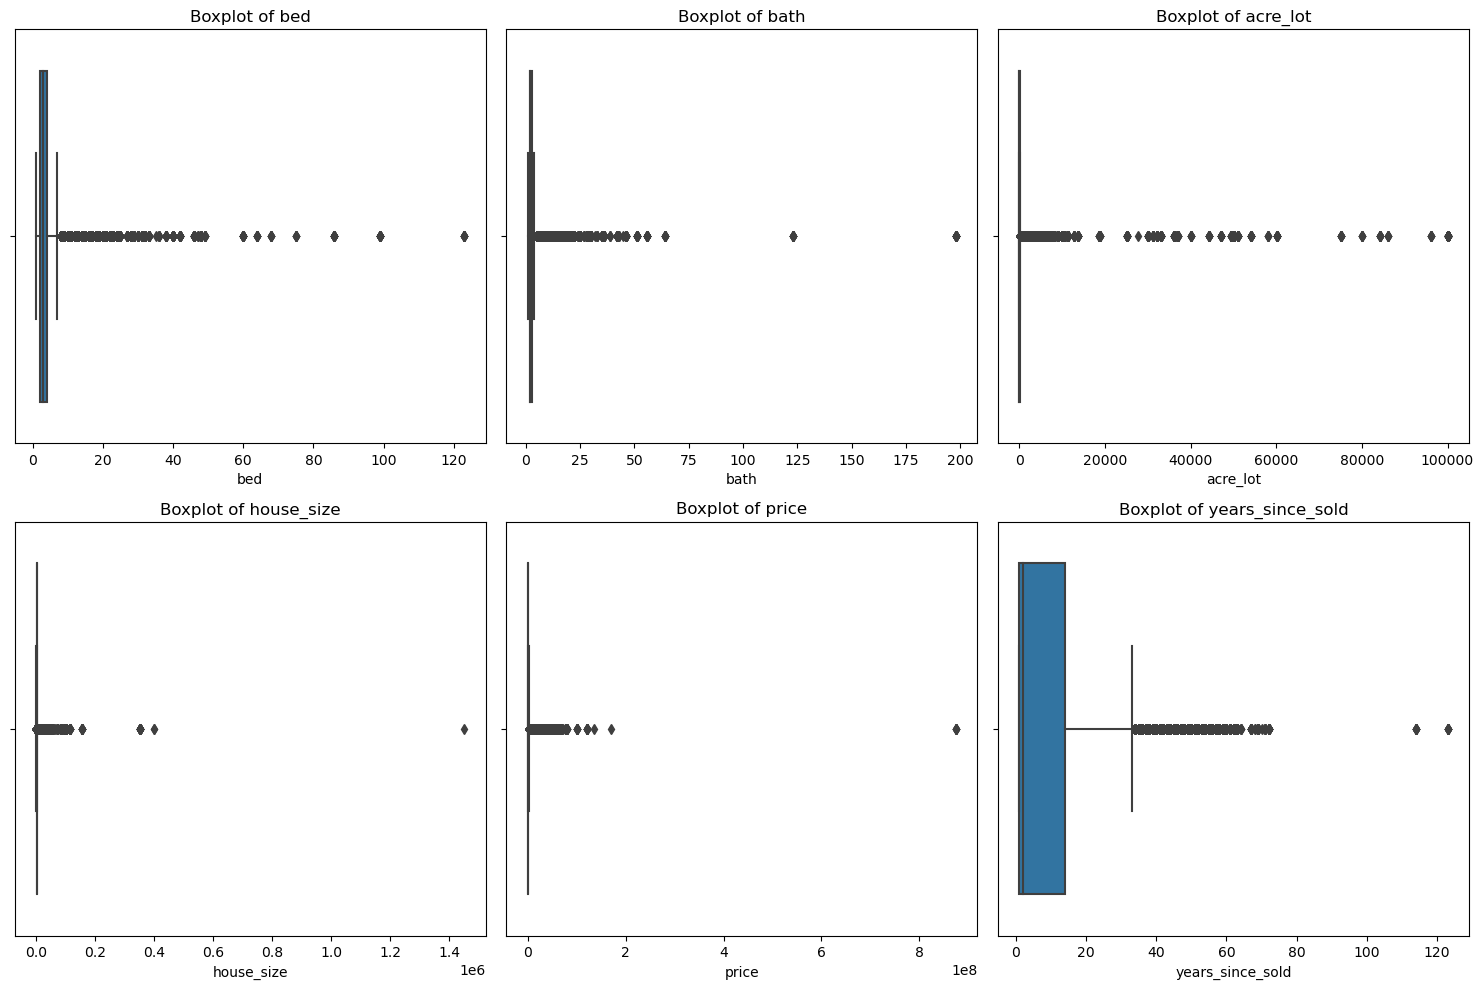

In [24]:
# List of numerical columns
numerical_columns = ['bed', 'bath', 'acre_lot', 'house_size', 'price','years_since_sold']

# Create a boxplot for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [25]:
# Identify and print abnormal values (outliers) for each numerical column
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Abnormal values in {column}:")
    print(outliers[[column]])
    print("\n")

Abnormal values in bed:
          bed
39        9.0
115       8.0
133       8.0
152      12.0
154       9.0
...       ...
1400226  11.0
1400323   8.0
1400422  11.0
1400468   9.0
1400872  10.0

[35589 rows x 1 columns]


Abnormal values in bath:
         bath
14        5.0
39        7.0
41        6.0
56        5.0
64        5.0
...       ...
1400629   5.0
1400651   6.0
1400757   5.0
1400807   5.0
1400836   6.0

[87668 rows x 1 columns]


Abnormal values in acre_lot:
         acre_lot
124        247.57
444        112.66
559        262.00
629        135.00
634        139.00
...           ...
1399903    159.31
1400768     95.30
1400807    151.85
1400817    155.00
1400870    155.00

[16076 rows x 1 columns]


Abnormal values in house_size:
         house_size
9            5403.0
12           4161.0
16           3450.0
18           4000.0
36           3690.0
...             ...
1400785      4028.0
1400793      3924.0
1400836      6206.0
1400868      4260.0
1400872      4802.0

[120500 rows x

In [26]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each numerical column
for column in numerical_columns:
    df = remove_outliers(df, column)

# Display the DataFrame after removing outliers
print(df.describe())

                bed          bath      acre_lot    house_size         price  \
count  1.110643e+06  1.110643e+06  1.110643e+06  1.110643e+06  1.110643e+06   
mean   3.046156e+00  2.109557e+00  1.019786e+01  1.806785e+03  4.321590e+05   
std    1.139719e+00  8.175719e-01  1.468630e+01  6.210364e+02  2.981161e+05   
min    1.000000e+00  1.000000e+00  0.000000e+00  1.000000e+02  0.000000e+00   
25%    2.000000e+00  1.000000e+00  1.700000e-01  1.291000e+03  1.999000e+05   
50%    3.000000e+00  2.000000e+00  7.300000e-01  2.100000e+03  3.699000e+05   
75%    3.392347e+00  2.487426e+00  3.215013e+01  2.178643e+03  5.999000e+05   
max    7.000000e+00  4.000000e+00  8.000000e+01  3.430000e+03  1.395995e+06   

       years_since_sold  
count      1.110643e+06  
mean       7.294870e+00  
std        8.544449e+00  
min        1.000000e+00  
25%        1.000000e+00  
50%        2.000000e+00  
75%        1.200000e+01  
max        3.300000e+01  


In [27]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_file.csv', index=False)

In [28]:
df=pd.read_csv('cleaned_file.csv',low_memory=False)
df.status.unique()

array(['for_sale', 'ready_to_build'], dtype=object)

In [29]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by='%')

,count,%
status,0,0.0
bed,0,0.0
bath,0,0.0
acre_lot,0,0.0
city,0,0.0
state,0,0.0
zip_code,0,0.0
house_size,0,0.0
prev_sold_date,0,0.0
price,0,0.0


In [30]:
df['status'].value_counts()

for_sale          1108993
ready_to_build       1650
Name: status, dtype: int64

In [31]:
# Calculate the value counts for the 'city' column
city_counts = df['city'].value_counts()
city_counts.tail()

Hinckley                1
Plymouth Meeting        1
Chester Heights         1
Ridge Dr                1
Farmersville Station    1
Name: city, dtype: int64

In [32]:
df['zip_code'].value_counts()

11375.0    6347
7024.0     4143
12180.0    4121
10022.0    4042
12401.0    4017
           ... 
4733.0        1
4669.0        1
4637.0        1
4629.0        1
4419.0        1
Name: zip_code, Length: 4143, dtype: int64

In [33]:
zip_code_counts = df['zip_code'].value_counts()
city_counts.tail()

Hinckley                1
Plymouth Meeting        1
Chester Heights         1
Ridge Dr                1
Farmersville Station    1
Name: city, dtype: int64

In [34]:
df.shape

(1110643, 12)

## 3. Exploratory Data Analysis

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,1110643.0,3.046156,1.139719,1.0,2.00,3.00,3.392347,7.0
bath,1110643.0,2.109557,0.817572,1.0,1.00,2.00,2.487426,4.0
acre_lot,1110643.0,10.197863,14.686297,0.0,0.17,0.73,32.150131,80.0
house_size,1110643.0,1806.785162,621.036360,100.0,1291.00,2100.00,2178.642539,3430.0
price,1110643.0,432159.003254,298116.147934,0.0,199900.00,369900.00,599900.000000,1395995.0
prev_sold_year,1110643.0,2016.705130,8.544449,1991.0,2012.00,2022.00,2023.000000,2023.0
years_since_sold,1110643.0,7.294870,8.544449,1.0,1.00,2.00,12.000000,33.0


In [36]:
df.set_index(['state', 'city', 'zip_code']).groupby(['state', 'city', 'zip_code']).mean(numeric_only=True)

bed      bath   acre_lot  \
state          city         zip_code                                  
Connecticut    Andover      6232.0    3.126423  2.490393   3.781333   
               Ansonia      6401.0    3.478539  2.030910   1.600590   
               Ashford      6278.0    3.228093  2.137052   2.921644   
               Avon         6001.0    3.139087  2.692987   9.761903   
               Barkhamsted  6063.0    3.425221  2.721122   7.384570   
...                                        ...       ...        ...   
Virgin Islands Saint Thomas 802.0     3.080347  2.335501   8.158167   
Virginia       Cape Charles 23310.0   3.392347  2.487426   0.241818   
               Chincoteague 23336.0   3.392347  2.487426  14.638059   
West Virginia  Wyoming      24898.0   4.000000  2.000000   0.170000   
Wyoming        Cody         82414.0   3.000000  3.000000   0.290000   

                                       house_size          price  \
state          city         zip_code                               
Connecticut    Andover      6232.0    1791.318151  257601.111111   
               Ansonia      6401.0    1607.890233  272780.975610   
               Ashford      6278.0    1853.931911  258780.136986   
               Avon         6001.0    2076.172079  367874.925486   
               Barkhamsted  6063.0    2260.307110  376061.328125   
...                                           ...            ...   
Virgin Islands Saint Thomas 802.0     1973.839282  366157.142857   
Virginia       Cape Charles 23310.0   2178.642539  710000.000000   
               Chincoteague 23336.0   2178.642539  170700.000000   
West Virginia  Wyoming      24898.0   1860.000000   62500.000000   
Wyoming        Cody         82414.0   1935.000000  535000.000000   

                                      prev_sold_year  years_since_sold  
state          city         zip_code                                    
Connecticut    Andover      6232.0       2015.277778          8.722222  
               Ansonia      6401.0       2013.029268         10.970732  
               Ashford      6278.0       2015.643836          8.356164  
               Avon         6001.0       2016.234341          7.765659  
               Barkhamsted  6063.0       2015.074219          8.925781  
...                                              ...               ...  
Virgin Islands Saint Thomas 802.0        2023.000000          1.000000  
Virginia       Cape Charles 23310.0      2023.000000          1.000000  
               Chincoteague 23336.0      2023.000000          1.000000  
West Virginia  Wyoming      24898.0      2023.000000          1.000000  
Wyoming        Cody         82414.0      2023.000000          1.000000  

[6774 rows x 7 columns]

<Axes: >

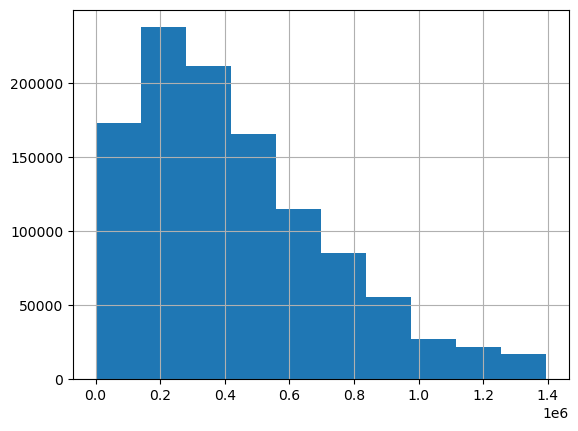

In [37]:
df['price'].hist()

C:\Users\myliu\AppData\Local\Temp\ipykernel_25380\4285261747.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


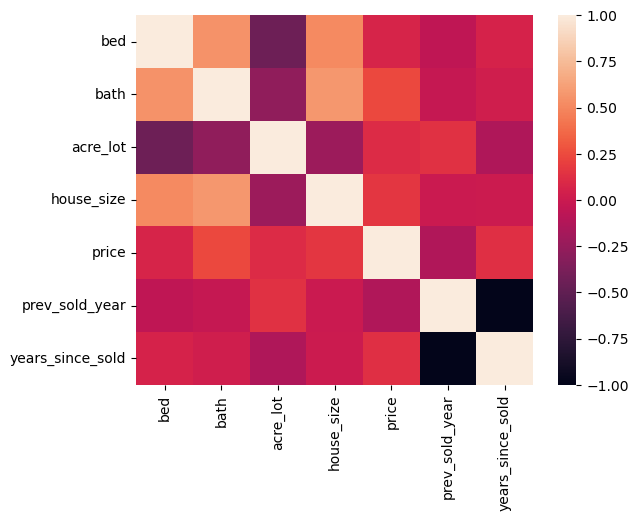

In [38]:
# Make a heatmap of the data 
correlation_matrix = df.corr()
_ = sns.heatmap(correlation_matrix)

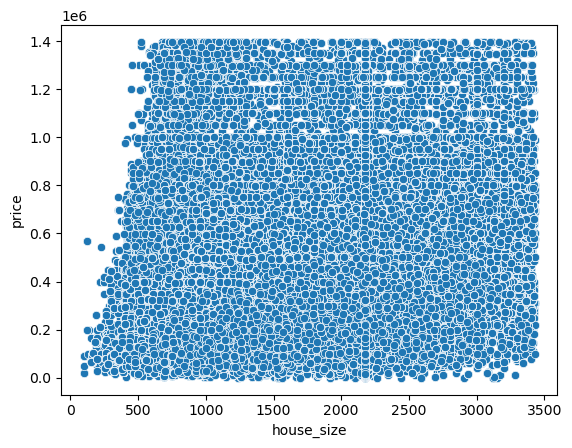

In [39]:
# Plot house_size against price
_ = sns.scatterplot(x='house_size', y='price', data=df)

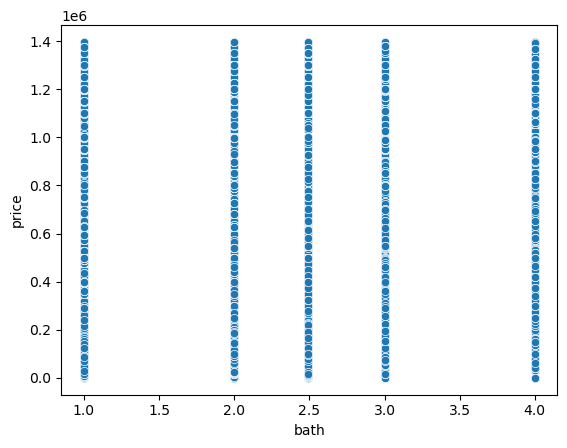

In [40]:
# Plot bath against price
_ = sns.scatterplot(x='bath', y='price', data=df)

In [41]:
df['average_acre_lot'] = df['acre_lot']/df['bed']

In [42]:
df['average_house_size'] = df['house_size']/df['bed']

In [43]:
df['bath/bed'] = df['bath']/df['bed']

In [44]:
df['acre_lot/house_size']=df['acre_lot']/df['house_size']

In [45]:
df = df.drop(columns = ['prev_sold_date','prev_sold_year'])

In [46]:
print("\nNaN values in the DataFrame:")
print(df.isnull().sum())


NaN values in the DataFrame:
status                 0
bed                    0
bath                   0
acre_lot               0
city                   0
state                  0
zip_code               0
house_size             0
price                  0
years_since_sold       0
average_acre_lot       0
average_house_size     0
bath/bed               0
acre_lot/house_size    0
dtype: int64


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110643 entries, 0 to 1110642
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   status               1110643 non-null  object 
 1   bed                  1110643 non-null  float64
 2   bath                 1110643 non-null  float64
 3   acre_lot             1110643 non-null  float64
 4   city                 1110643 non-null  object 
 5   state                1110643 non-null  object 
 6   zip_code             1110643 non-null  object 
 7   house_size           1110643 non-null  float64
 8   price                1110643 non-null  float64
 9   years_since_sold     1110643 non-null  int64  
 10  average_acre_lot     1110643 non-null  float64
 11  average_house_size   1110643 non-null  float64
 12  bath/bed             1110643 non-null  float64
 13  acre_lot/house_size  1110643 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 1

In [48]:
df.to_csv('updated_file.csv', index=False)

In [49]:
df = pd.read_csv('updated_file.csv',low_memory=False)

C:\Users\myliu\AppData\Local\Temp\ipykernel_25380\4285261747.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


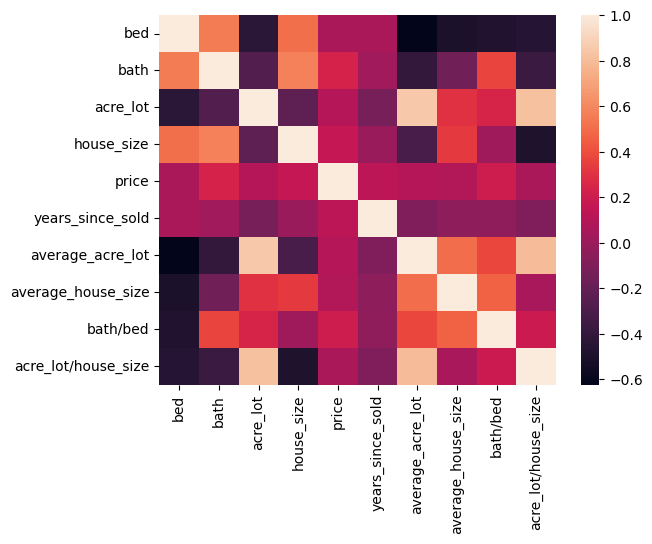

In [50]:
# Make a heatmap of the data 
correlation_matrix = df.corr()
_ = sns.heatmap(correlation_matrix)

In [51]:
df.set_index(['state','city','zip_code']).groupby(['state','city','zip_code','bath']).mean()

C:\Users\myliu\AppData\Local\Temp\ipykernel_25380\4154707131.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.set_index(['state','city','zip_code']).groupby(['state','city','zip_code','bath']).mean()


bed   acre_lot  \
state          city         zip_code bath                            
Connecticut    Andover      6232.0   2.000000  3.000000   0.935484   
                                     2.487426  3.392347   2.155862   
                                     3.000000  3.000000   8.293333   
               Ansonia      6401.0   1.000000  2.400000   3.402013   
                                     2.000000  3.905172   0.254397   
...                                                 ...        ...   
Virgin Islands Saint Thomas 802.0    4.000000  4.500000   1.345000   
Virginia       Cape Charles 23310.0  2.487426  3.392347   0.241818   
               Chincoteague 23336.0  2.487426  3.392347  14.638059   
West Virginia  Wyoming      24898.0  2.000000  4.000000   0.170000   
Wyoming        Cody         82414.0  3.000000  3.000000   0.290000   

                                                house_size          price  \
state          city         zip_code bath                                   
Connecticut    Andover      6232.0   2.000000  1088.903226  283629.032258   
                                     2.487426  2178.642539  138193.103448   
                                     3.000000  2142.733333  346133.333333   
               Ansonia      6401.0   1.000000  1123.000000  200370.000000   
                                     2.000000  1663.077586  290414.655172   
...                                                    ...            ...   
Virgin Islands Saint Thomas 802.0    4.000000  3150.000000  912000.000000   
Virginia       Cape Charles 23310.0  2.487426  2178.642539  710000.000000   
               Chincoteague 23336.0  2.487426  2178.642539  170700.000000   
West Virginia  Wyoming      24898.0  2.000000  1860.000000   62500.000000   
Wyoming        Cody         82414.0  3.000000  1935.000000  535000.000000   

                                               years_since_sold  \
state          city         zip_code bath                         
Connecticut    Andover      6232.0   2.000000         22.387097   
                                     2.487426          1.000000   
                                     3.000000          2.066667   
               Ansonia      6401.0   1.000000          9.100000   
                                     2.000000          9.913793   
...                                                         ...   
Virgin Islands Saint Thomas 802.0    4.000000          1.000000   
Virginia       Cape Charles 23310.0  2.487426          1.000000   
               Chincoteague 23336.0  2.487426          1.000000   
West Virginia  Wyoming      24898.0  2.000000          1.000000   
Wyoming        Cody         82414.0  3.000000          1.000000   

                                               average_acre_lot  \
state          city         zip_code bath                         
Connecticut    Andover      6232.0   2.000000          0.311828   
                                     2.487426          0.635508   
                                     3.000000          2.764444   
               Ansonia      6401.0   1.000000          1.711507   
                                     2.000000          0.069679   
...                                                         ...   
Virgin Islands Saint Thomas 802.0    4.000000          0.291250   
Virginia       Cape Charles 23310.0  2.487426          0.071283   
               Chincoteague 23336.0  2.487426          4.315024   
West Virginia  Wyoming      24898.0  2.000000          0.042500   
Wyoming        Cody         82414.0  3.000000          0.096667   

                                               average_house_size  bath/bed  \
state          city         zip_code bath                                     
Connecticut    Andover      6232.0   2.000000          362.967742  0.666667   
                                     2.487426          642.222774  0.733246   
                                     3.000000          714.244444  1.000000   


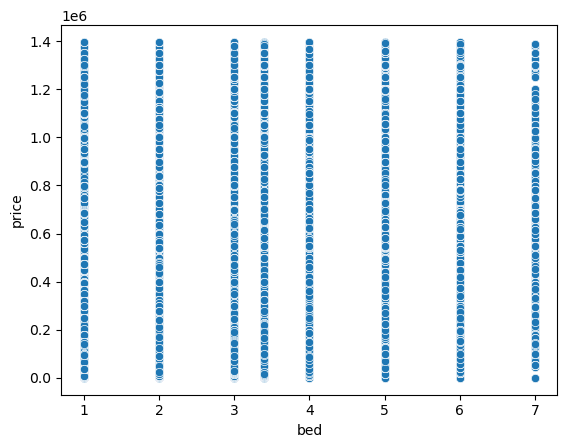

In [52]:
# Plot bed against price
_ = sns.scatterplot(x='bed', y='price', data=df)

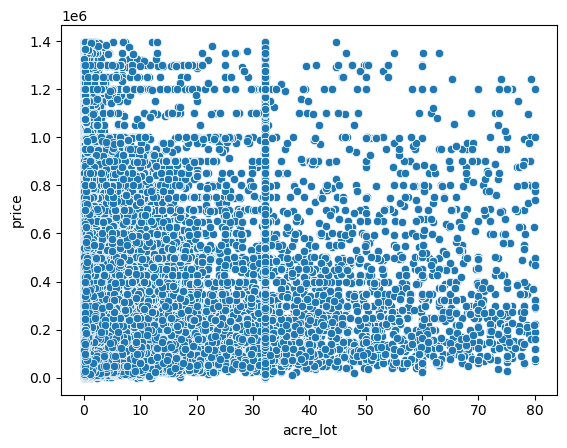

In [53]:
# Plot acre_lot against price
_ = sns.scatterplot(x='acre_lot', y='price', data=df)

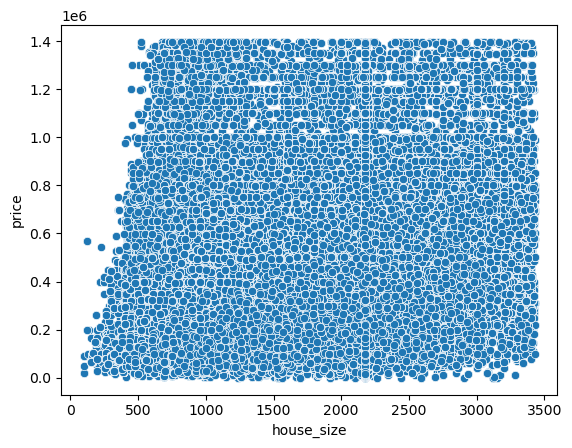

In [54]:
# Plot house_size against price
_ = sns.scatterplot(x='house_size', y='price', data=df)

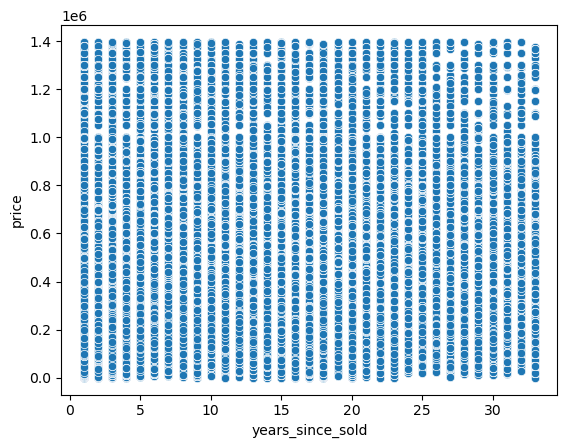

In [55]:
# Plot years_since_sold against price
_ = sns.scatterplot(x='years_since_sold', y='price', data=df)

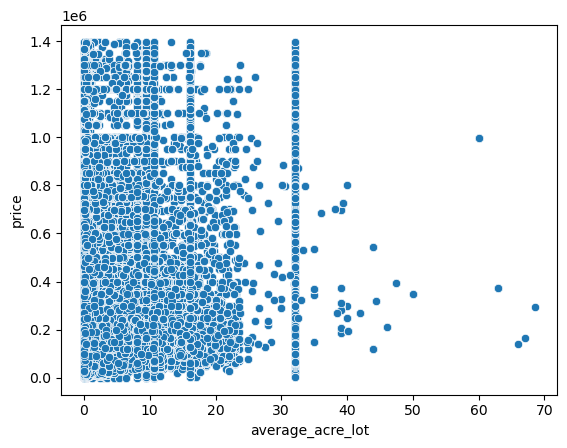

In [56]:
# Plot average_acre_lot against price
_ = sns.scatterplot(x='average_acre_lot', y='price', data=df)

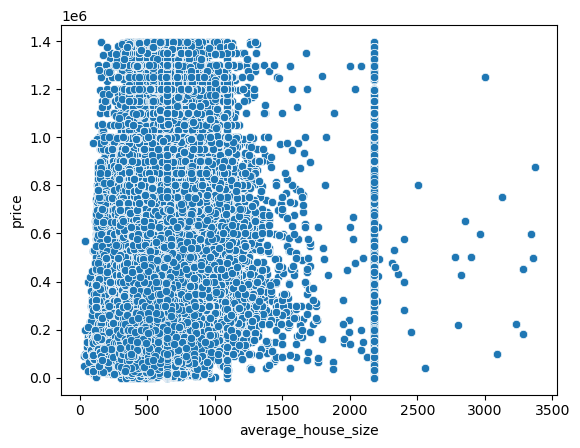

In [57]:
# Plot average_house_size against price
_ = sns.scatterplot(x='average_house_size', y='price', data=df)

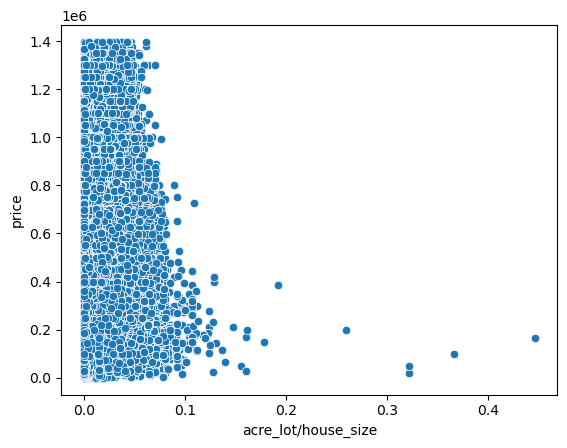

In [58]:
# Plot acre_lot/house_size against price
_ = sns.scatterplot(x='acre_lot/house_size', y='price', data=df)

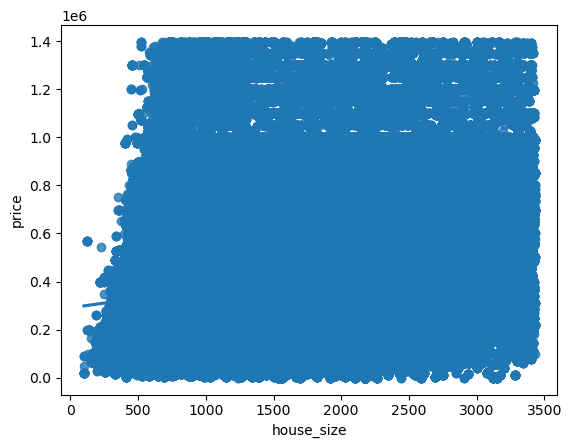

In [59]:
# Call the regplot method on the sns object, with parameters: x = 'house_size', y = 'price'
_ = sns.regplot(x='house_size', y='price', data=df)

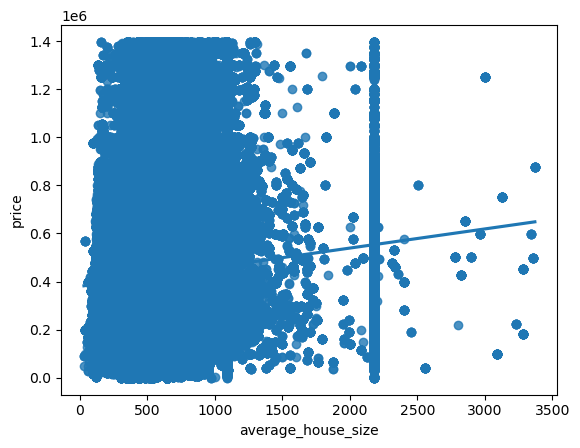

In [60]:
# Call the regplot method on the sns object, with parameters: x = 'average_house_size', y = 'price'
_ = sns.regplot(x='average_house_size', y='price', data=df)

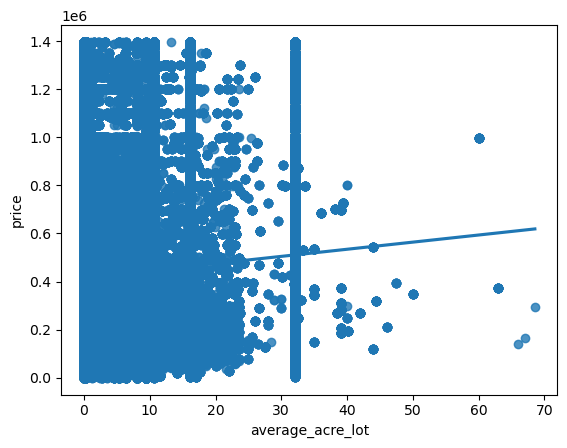

In [61]:
# Call the regplot method on the sns object, with parameters: x = 'average_acre_lot', y = 'price'
_ = sns.regplot(x='average_acre_lot', y='price', data=df)

## 4. Two Pre-processing & Training Data Development

In [62]:
df = pd.read_csv('updated_file.csv',low_memory=False)

In [63]:
df.status.unique()

array(['for_sale', 'ready_to_build'], dtype=object)

In [64]:
# turns status column into a dummy variable 
dummy=pd.get_dummies(df['status'])
dummy.tail()

,for_sale,ready_to_build
1110638,1,0
1110639,1,0
1110640,1,0
1110641,1,0
1110642,1,0


In [65]:
dummy.head()

,for_sale,ready_to_build
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [66]:
# Filter rows where status is 'ready_to_build'
ready_to_build_df = df[df['status'] == 'ready_to_build']

# Display the filtered DataFrame
print(ready_to_build_df)

# If you only want to count the number of such rows
ready_to_build_count = len(ready_to_build_df)
print(f"Number of 'ready_to_build' entries: {ready_to_build_count}")

                status  bed      bath   acre_lot                city  \
62055   ready_to_build  2.0  2.487426  32.150131          Boxborough   
62057   ready_to_build  2.0  2.487426  32.150131          Boxborough   
62058   ready_to_build  2.0  2.487426  32.150131          Boxborough   
62059   ready_to_build  2.0  2.487426  32.150131          Boxborough   
62060   ready_to_build  2.0  2.487426  32.150131          Boxborough   
...                ...  ...       ...        ...                 ...   
993519  ready_to_build  3.0  2.487426  32.150131  Upper Saddle River   
993520  ready_to_build  3.0  2.487426  32.150131      Franklin Lakes   
993522  ready_to_build  3.0  2.487426  32.150131  Upper Saddle River   
993523  ready_to_build  3.0  2.487426  32.150131      Franklin Lakes   
993524  ready_to_build  3.0  2.487426  32.150131      Franklin Lakes   

                state zip_code  house_size      price  years_since_sold  \
62055   Massachusetts   1719.0      2516.0   852995.0       

In [67]:
df=pd.concat([df,dummy],axis=1)
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price,years_since_sold,average_acre_lot,average_house_size,bath/bed,acre_lot/house_size,for_sale,ready_to_build
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.000000,105000.0,1,0.040000,306.666667,0.666667,0.000130,1,0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.000000,80000.0,1,0.020000,381.750000,0.500000,0.000052,1,0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.000000,67000.0,1,0.075000,374.000000,0.500000,0.000201,1,0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.000000,145000.0,1,0.025000,450.000000,0.500000,0.000056,1,0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,2178.642539,65000.0,1,0.008333,363.107090,0.333333,0.000023,1,0


In [68]:
df=df.merge(dummy,left_index=True,right_index=True)
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price,years_since_sold,average_acre_lot,average_house_size,bath/bed,acre_lot/house_size,for_sale_x,ready_to_build_x,for_sale_y,ready_to_build_y
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.000000,105000.0,1,0.040000,306.666667,0.666667,0.000130,1,0,1,0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.000000,80000.0,1,0.020000,381.750000,0.500000,0.000052,1,0,1,0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.000000,67000.0,1,0.075000,374.000000,0.500000,0.000201,1,0,1,0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.000000,145000.0,1,0.025000,450.000000,0.500000,0.000056,1,0,1,0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,2178.642539,65000.0,1,0.008333,363.107090,0.333333,0.000023,1,0,1,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110643 entries, 0 to 1110642
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   status               1110643 non-null  object 
 1   bed                  1110643 non-null  float64
 2   bath                 1110643 non-null  float64
 3   acre_lot             1110643 non-null  float64
 4   city                 1110643 non-null  object 
 5   state                1110643 non-null  object 
 6   zip_code             1110643 non-null  object 
 7   house_size           1110643 non-null  float64
 8   price                1110643 non-null  float64
 9   years_since_sold     1110643 non-null  int64  
 10  average_acre_lot     1110643 non-null  float64
 11  average_house_size   1110643 non-null  float64
 12  bath/bed             1110643 non-null  float64
 13  acre_lot/house_size  1110643 non-null  float64
 14  for_sale_x           1110643 non-null  uint8  
 15

In [70]:
from sklearn.preprocessing import StandardScaler

# point numeric_columns
numeric_columns = ['bed', 'bath', 'acre_lot', 'house_size', 'price','years_since_sold','average_acre_lot',
                   'average_house_size','bath/bed','acre_lot/house_size']

# Select only the numeric columns for standardization
numeric_df = df[numeric_columns]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric data
scaled_features = scaler.fit_transform(numeric_df)

# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=numeric_columns)

# Display the first few rows of the scaled DataFrame
print(scaled_df.head())

        bed      bath  acre_lot  house_size     price  years_since_sold  \
0 -0.040498 -0.134003 -0.686209   -1.427912 -1.097422         -0.736721   
1  0.836912 -0.134003 -0.688933   -0.450514 -1.181282         -0.736721   
2 -0.917907 -1.357138 -0.684166   -1.704869 -1.224889         -0.736721   
3  0.836912 -0.134003 -0.687571   -0.010926 -0.963246         -0.736721   
4  2.591731 -0.134003 -0.690975    0.598769 -1.231598         -0.736721   

   average_acre_lot  average_house_size  bath/bed  acre_lot/house_size  
0         -0.578197           -1.010219 -0.268967            -0.555330  
1         -0.580284           -0.794734 -0.844653            -0.560792  
2         -0.574544           -0.816976 -0.844653            -0.550425  
3         -0.579762           -0.598861 -0.844653            -0.560570  
4         -0.581501           -0.848238 -1.420339            -0.562852  


In [71]:
from sklearn.preprocessing import LabelEncoder

# Ensure the zip_code column is of type string to avoid issues with LabelEncoder
df['zip_code'] = df['zip_code'].astype(str)
df['city'] = df['city'].astype(str)
df['state'] = df['state'].astype(str)
# df['prev_sold_date'] = df['prev_sold_date'].astype(str)
df['status'] = df['status'].astype(str)

# Label encode the zip_code column
le = LabelEncoder()
df['zip_code_encoded'] = le.fit_transform(df['zip_code'])
zip_code_labelencode_df = df['zip_code_encoded']

# Label encode the city column
df['city_encoded'] = le.fit_transform(df['city'])
city_labelencode_df = df['city_encoded']

# Label encode the state column
df['state_encoded'] = le.fit_transform(df['state'])
state_labelencode_df = df['state_encoded']

# Label encode the prev_sold_date column
# df['prev_sold_date_encoded'] = le.fit_transform(df['prev_sold_date'])
# prev_sold_date_labelencode_df = df['prev_sold_date_encoded']

# Label encode the status column
df['status_encoded'] = le.fit_transform(df['status'])
status_labelencode_df = df['status_encoded']

In [72]:
# Concatenate the encoded zip_code column back into the DataFrame
df = pd.concat([scaled_df, zip_code_labelencode_df,city_labelencode_df,state_labelencode_df,status_labelencode_df], axis=1)

# Display the updated DataFrame
print("Updated DataFrame with Label Encoded zip_code:")
print(df)

Updated DataFrame with Label Encoded zip_code:
              bed      bath  acre_lot  house_size     price  years_since_sold  \
0       -0.040498 -0.134003 -0.686209   -1.427912 -1.097422         -0.736721   
1        0.836912 -0.134003 -0.688933   -0.450514 -1.181282         -0.736721   
2       -0.917907 -1.357138 -0.684166   -1.704869 -1.224889         -0.736721   
3        0.836912 -0.134003 -0.687571   -0.010926 -0.963246         -0.736721   
4        2.591731 -0.134003 -0.690975    0.598769 -1.231598         -0.736721   
...           ...       ...       ...         ...       ...               ...   
1110638 -0.040498 -0.134003 -0.490108   -0.384495 -0.812633          2.072122   
1110639 -0.040498 -1.357138 -0.687571   -1.295875 -1.349337         -0.034510   
1110640  0.836912 -0.134003 -0.669867    0.352982 -0.819342          1.955087   
1110641 -0.917907 -0.134003 -0.684847   -0.384495 -1.141029          1.603981   
1110642  1.714322 -0.134003 -0.684847    0.162977 -1.114529   

In [73]:
# df.to_csv('final_data_labelencode.csv', index=False)
df.to_csv('final_data_labelencode.csv', index=False)

In [74]:
from sklearn.model_selection import train_test_split

# df = pd.read_csv('final_data_labelencode.csv')
df = pd.read_csv('final_data_labelencode.csv',low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110643 entries, 0 to 1110642
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   bed                  1110643 non-null  float64
 1   bath                 1110643 non-null  float64
 2   acre_lot             1110643 non-null  float64
 3   house_size           1110643 non-null  float64
 4   price                1110643 non-null  float64
 5   years_since_sold     1110643 non-null  float64
 6   average_acre_lot     1110643 non-null  float64
 7   average_house_size   1110643 non-null  float64
 8   bath/bed             1110643 non-null  float64
 9   acre_lot/house_size  1110643 non-null  float64
 10  zip_code_encoded     1110643 non-null  int64  
 11  city_encoded         1110643 non-null  int64  
 12  state_encoded        1110643 non-null  int64  
 13  status_encoded       1110643 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 118.6 MB


In [75]:
# Use 'price' as the target variable
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting splits
print("\nShapes of the resulting splits:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Shapes of the resulting splits:
X_train: (888514, 13), X_test: (222129, 13)
y_train: (888514,), y_test: (222129,)


## 5.Modeling

### 5.1 use linear regression model

In [76]:
# use final_data_labelencode

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Model Performance:
Mean Squared Error: 0.8443409875971409
R^2 Score: 0.15328624829493187


### 5.2 use Random Forest Model

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [78]:
# Assuming 'price' is the target variable
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Model Performance:
Mean Squared Error: 0.014193229245588218
R^2 Score: 0.9857668849909297


### 5.3 use Neural Networks Model

In [79]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
# Assuming 'price' is the target variable
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Model Performance:
Mean Squared Error: 0.3350867183075398
R^2 Score: 0.6639716221616279


## 6.conclusion

6.1 Dataset Overview

This dataset has a total of 1,401,066 entries and 10 columns. The columns include a mix of object and float64 data types, with some missing values across several columns.

Here's a quick summary of each column:
    status: A categorical column (likely containing strings) with no missing values.
    bed: A numerical column (floating-point) with some missing values (around 1,216,528 non-null values).
    bath: Another numerical column with some missing values.
    acre_lot: A numerical column representing lot sizes, with a significant number of missing values.
    city: A categorical column with very few missing values.
    state: A categorical column without missing values.
    zip_code: A numerical column representing zip codes with some missing values.
    house_size: A numerical column with substantial missing values.
    prev_sold_date: A date column represented as an object, with a large number of missing values.
    price: A numerical column with few missing values.

6.2 Data Cleaning
•	Handle Missing Values: Decide on strategies to fill missing values in numerical and categorical columns.
•	Convert Data Types: Convert prev_sold_date from an object to a datetime type.
•	Outlier Detection: Identify and potentially remove or adjust outliers in numerical columns like price, acre_lot, or house_size.

6.3 Exploratory Data Analysis (EDA)
•	Summary Statistics: Calculate mean, median, and mode for numerical columns.
•	Visualizations: Use histograms, box plots, and scatter plots to understand the distribution of numerical data.
•	Correlation Analysis: Explore correlations between price and other numerical features.

6.4 Feature Engineering
•	Create New Features: Use existing columns to create new features, like 'average_acre_lot','average_house_size',etc.
•	Encode Categorical Variables: Convert status, city, zip_code, and state into numerical formats for machine learning tasks.

6.5 Machine Learning Models
•	Regression Models: Predict price based on other features using linear regression.
          Model Performance:
          Mean Squared Error: 0.8443409875971409
          R^2 Score: 0.15328624829493187
•	Random Forest Model: 
          Model Performance:
          Mean Squared Error: 0.014193229245588218
          R^2 Score: 0.9857668849909297
•	Neural Networks Model: 
          Model Performance:
          Mean Squared Error: 0.3350867183075398
          R^2 Score: 0.6639716221616279
   Comparing the prediction performance of the three models, random forest has the best prediction effect, with a prediction accuracy of 99%，We recommend choosing the random forest model as the prediction model.